In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [121]:
UNSW = pd.read_csv("C:/Users/vaiji/FYP/Non-Image to Image/UNSW_NB15_train_test-merge.csv")

In [122]:
UNSW

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [123]:
Y_label = OHE_dataset['label']

In [138]:
Y_label

0         0
1         0
2         0
3         0
4         0
         ..
257668    0
257669    0
257670    0
257671    0
257672    0
Name: label, Length: 257673, dtype: int64

In [4]:
OHE_dataset = pd.get_dummies(UNSW, columns = ['proto', 'service', 'state'])
OHE_dataset.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [5]:
X = OHE_dataset
X = X.drop(['attack_cat','label'], axis = 1)
X.shape

(257673, 196)

In [6]:
y = OHE_dataset['attack_cat']
y.shape

(257673,)

In [7]:
ln = LogScaler()
X_norm = ln.fit_transform(X)

In [8]:
it = ImageTransformer(feature_extractor = 'tsne', pixels = 50, random_state = 1701, n_jobs = -1)

In [9]:
X_norm.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.027889,0.224244,0.172921,0.342570,0.312312,0.312595,0.997874,1.000000,0.424562,0.534539,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.121803,0.298992,0.393619,0.402435,0.645181,0.316704,0.747160,0.998579,0.401347,0.775718,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.234590,0.248307,0.304405,0.361875,0.574953,0.196832,0.747160,0.998579,0.326962,0.650937,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.239956,0.284592,0.275582,0.393308,0.402879,0.194440,0.747160,0.998579,0.351625,0.479722,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.090294,0.267969,0.209072,0.383876,0.339064,0.256038,0.999294,0.998579,0.402218,0.489854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\vaiji\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vaiji\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


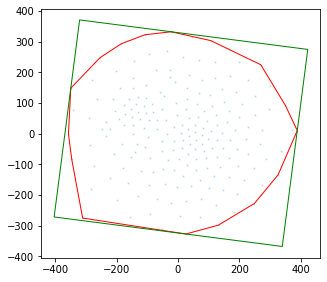

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 30, metric = 'cosine', random_state = 1701, n_jobs = -1)
it = ImageTransformer(feature_extractor = tsne, pixels = 50)

plt.figure(figsize = (5,5))
_ = it.fit(X_norm, plot = True)

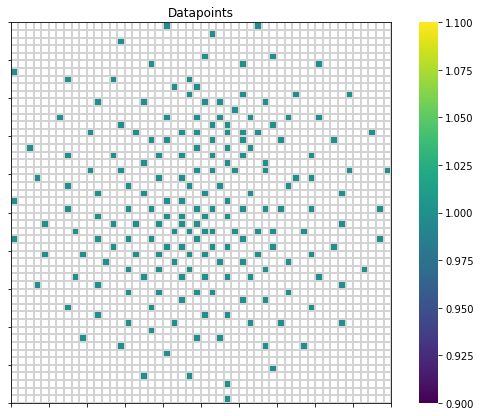

In [11]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize = (10,7))

ax = sns.heatmap(fdm, cmap = "viridis", linewidths = 0.01, linecolor = "lightgrey", square = True)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Datapoints")

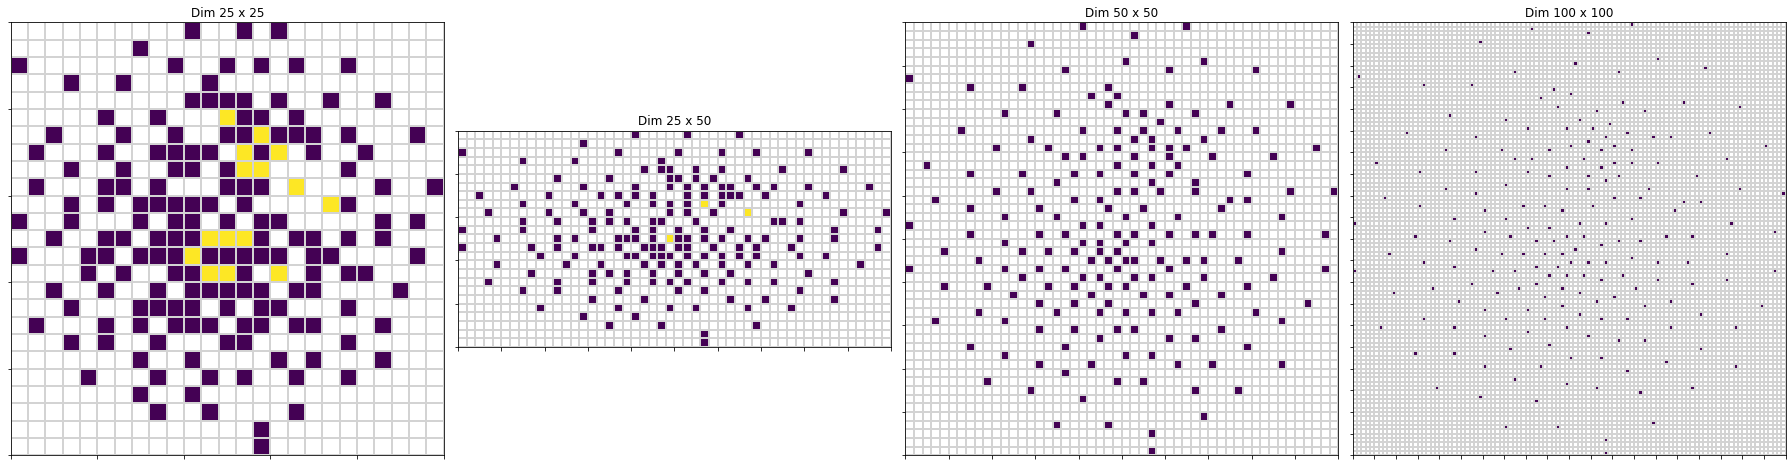

In [12]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)
    cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()    
    
it.pixels = 50

In [13]:
X_norm

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.027889,0.224244,0.172921,0.342570,0.312312,0.312595,0.997874,1.000000,0.424562,0.534539,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.121803,0.298992,0.393619,0.402435,0.645181,0.316704,0.747160,0.998579,0.401347,0.775718,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.234590,0.248307,0.304405,0.361875,0.574953,0.196832,0.747160,0.998579,0.326962,0.650937,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.239956,0.284592,0.275582,0.393308,0.402879,0.194440,0.747160,0.998579,0.351625,0.479722,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.090294,0.267969,0.209072,0.383876,0.339064,0.256038,0.999294,0.998579,0.402218,0.489854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000001,0.149496,0.000000,0.294898,0.000000,0.883505,0.999294,0.000000,0.810054,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
257669,0.181187,0.333333,0.236073,0.594851,0.355876,0.234168,0.999294,0.998579,0.520982,0.455855,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
257670,0.000000,0.118473,0.000000,0.258663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
257671,0.000000,0.118473,0.000000,0.258663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_img = it.fit_transform(X_norm)

C:\Users\vaiji\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vaiji\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# Normal

'Normal'

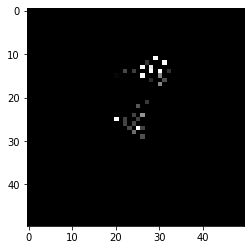

In [15]:
plt.imshow(X_img[0])
y[0]

# Recon

'Reconnaissance'

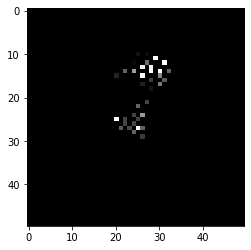

In [52]:
plt.imshow(X_img[126679])
y[126679]

# Generic

'Generic'

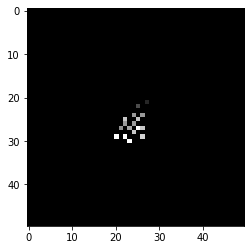

In [17]:
plt.imshow(X_img[134282])
y[134282]

# Fuzzers

'Fuzzers'

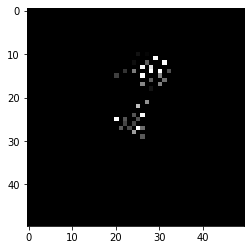

In [55]:
plt.imshow(X_img[86754])
y[86754]

# DOS

'DoS'

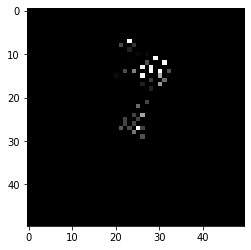

In [56]:
plt.imshow(X_img[86753])
y[86753]

# Exploits

'Exploits'

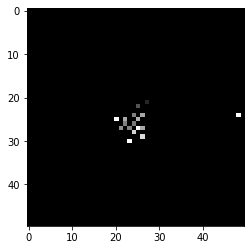

In [57]:
plt.imshow(X_img[86753])
y[86753]

# Analysis

'Analysis'

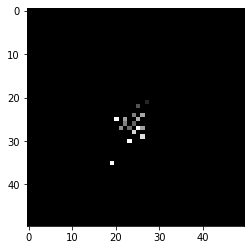

In [58]:
plt.imshow(X_img[86788])
y[86788]

# Backdoor

'Backdoor'

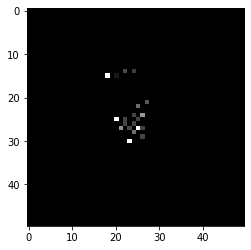

In [59]:
plt.imshow(X_img[86791])
y[86791]

# Shellcode

'Shellcode'

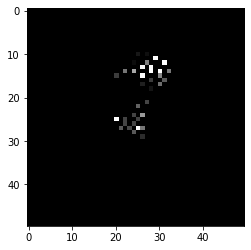

In [61]:
plt.imshow(X_img[86890])
y[86890]

# Worms

'Worms'

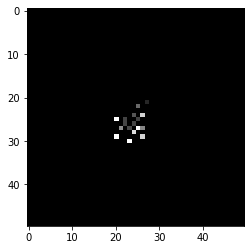

In [62]:
plt.imshow(X_img[184344])
y[184344]

In [18]:
#for i in range(0,257673):
#   plt.imshow(X_img[i])
#   plt.axis('off')
#   plt.savefig("UNSW_OHE_LogScaler_Images/%s.png" % i, bbox_inches='tight')

In [23]:
item_counts = y.value_counts()
print(item_counts)

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64


In [24]:
type(item_counts)

pandas.core.series.Series

In [25]:
count = pd.DataFrame(item_counts)

In [26]:
count

,attack_cat
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511
Worms,174


In [27]:
count.shape

(10, 1)

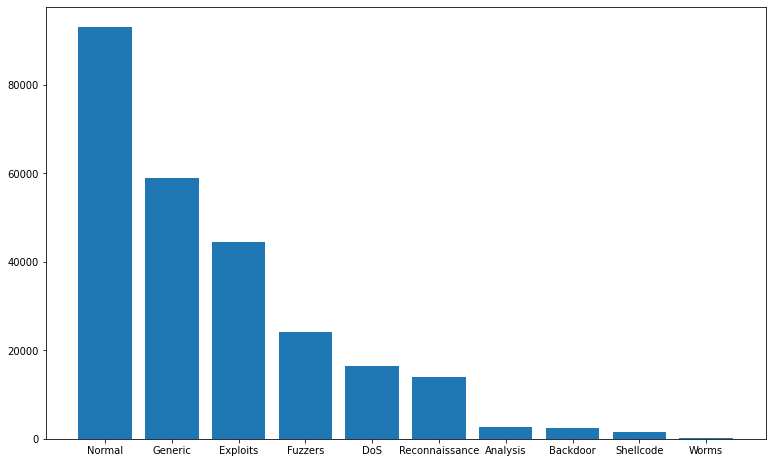

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))

ax = fig.add_axes([0,0,1,1])
langs = ['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance','Analysis','Backdoor','Shellcode','Worms']
students = [93000,58871,44525,24246,16353,13987,2677,2329,1511,174]
ax.bar(langs,students)
plt.savefig("bar_plot.png")
plt.show()


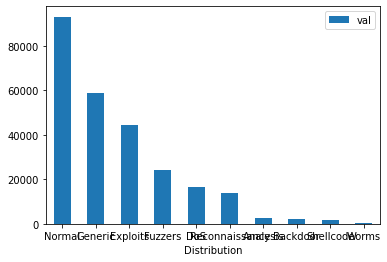

In [34]:
df = pd.DataFrame({'Distribution':['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance','Analysis','Backdoor','Shellcode','Worms'], 'val':[93000,58871,44525,24246,16353,13987,2677,2329,1511,174]})
ax = df.plot.bar(x='Distribution', rot=0)

In [47]:
def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

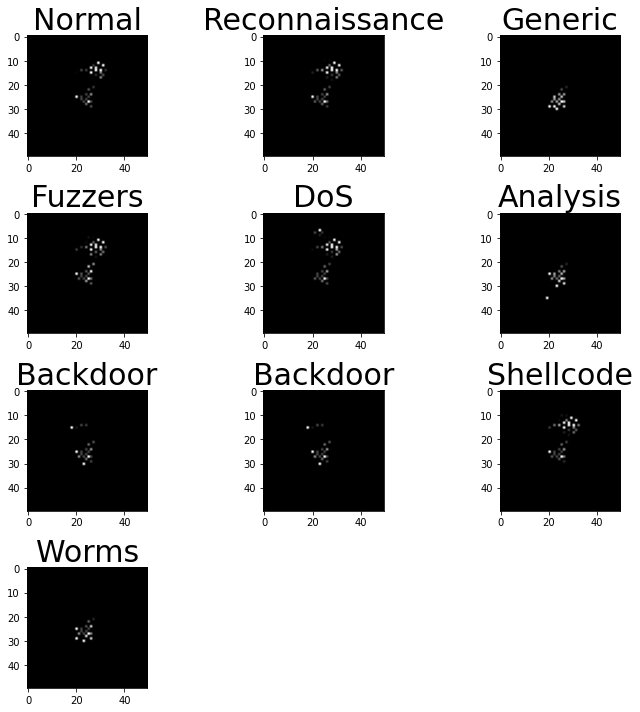

In [94]:
list_images = [X_img[0], X_img[86448],X_img[134282],X_img[86754],X_img[86753],X_img[86788],X_img[86791],X_img[86791],X_img[86890],X_img[184344]]

list_titles = [y[0],y[86448],y[134282],y[86754],y[86753],y[86788],y[86791],y[86791],y[86890],y[184344]]

show_image_list(list_images,list_titles, figsize=(10, 10), num_cols = 3, grid = False)

In [91]:
y_ = y

In [101]:
y_.shape

(257673,)

In [104]:
df = pd.Categorical(y_)


In [112]:
df.shape

(257673,)

In [120]:
df[257671]

'Normal'

In [ ]:
#Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance','Analysis','Backdoor','Shellcode','Worms'
for i in range(0,257674):
    if(y_[i] == "Normal"):
        y_[i] = 0;
    elif(y_[i] == "Generic"):
        y_[i] = 1;
    elif(y_[i] == "Exploits"):
        y_[i] = 2;
    elif(y_[i] == "Fuzzers"):
        y_[i] = 3;
    elif(y_[i] == "DoS"):  
        y_[i] = 4;
    elif(y_[i] == "Reconnaissance"):
        y_[i] = 5;
    elif(y_[i] == "Analysis"):
        y_[i] = 6;
    elif(y_[i] == "Backdoor"):
        y_[i] = 7;
    elif(y_[i] == "Shellcode"): 
        y_[i] = 8;
    else:
        y_[i] = 9;

C:\Users\vaiji\AppData\Local\Temp\ipykernel_19944\1671299784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_[i] = 0;


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_img, Y_label, random_state=10, test_size=0.2)

In [125]:
X_train.shape

(206138, 50, 50, 3)

In [139]:
y_train

257312    0
132068    1
257671    0
254203    0
179609    1
         ..
93553     1
181568    1
94735     1
236669    1
83209     1
Name: label, Length: 206138, dtype: int64

In [126]:
from tensorflow.keras.applications import *

In [127]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import pandas as pd
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers
import tensorflow as tf
#Use this to check if the GPU is configured correctly
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11396382988595123903
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14285799424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12323674557735417051
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [128]:
input_shape = (50,50,3)
#input_shape is (height, width, number of channels) for images
conv_base = EfficientNetB0(weights=None,include_top = False,input_shape = input_shape)

In [129]:
num_classes = 10

In [130]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
model.add(layers.Dropout(rate=0.2, name="dropout_out"))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(layers.Dense(num_classes, activation="softmax", name="fc_out"))
conv_base.trainable = False

In [131]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=["acc"],
)

C:\Users\vaiji\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [132]:
from tensorflow import keras

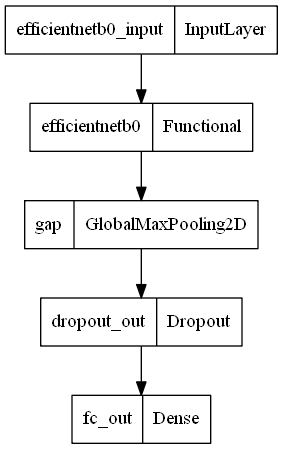

In [133]:
import pydot
keras.utils.plot_model(model)

In [141]:
y_train.shape

(206138,)

In [140]:
y_train

257312    0
132068    1
257671    0
254203    0
179609    1
         ..
93553     1
181568    1
94735     1
236669    1
83209     1
Name: label, Length: 206138, dtype: int64

In [144]:
conda install -c conda-forge python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vaiji\anaconda3\envs\tf

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    ------------------------------------------------------------
                                           Total:          20 KB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/noarch::python-graphviz-0.16-pyhd3eb1b0_1




python-graphviz-0.16 | 20 KB     |            |   0% 
python-graphviz-0.16 | 20 KB     | #######8   |  78% 
python-graphviz-0.16 | 20 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


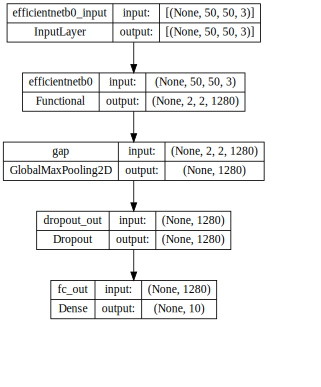

In [145]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz

SVG(model_to_dot(
    model, show_shapes=True, show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=60, subgraph=False
).create(prog='dot',format='svg'))

In [ ]:
model_history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
3527/6442 [===============>..............] - ETA: 37s - loss: 1.9512 - acc: 0.6423